## REGULAR TRAINING RESULTS (SUPERVISED AND UNSUPERVISED WEIGHTS)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = '/home/gianluca/PycharmProjects/benchmark_loss/Mask2Former/evaluation/data_results/results_regular_training.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()


,model,dataset,auroc,auprc,fpr@tpr95,time execution
0,DINO,RoadObstacle21,75.811%,0.036%,35.098%,2.93
1,DINO,RoadAnomaly21,84.113%,14.079%,74.675%,1.93
2,DINO,RoadAnomaly,52.145%,7.457%,78.081%,2.09
3,DINO,fs_static,94.588%,37.573%,16.845%,3.47
4,DINO,FS_LostFound_full,26.884%,0.034%,76.243%,2.96


In [11]:

# Data Cleaning and Preparation
# Remove '%' and convert to float
df['auroc'] = df['auroc'].str.rstrip('%').astype(float)
df['auprc'] = df['auprc'].str.rstrip('%').astype(float)
df['fpr@tpr95'] = df['fpr@tpr95'].str.rstrip('%').astype(float)
df['time execution'] = df['time execution'].astype(float)

# Summary Statistics
summary_stats = df.groupby('model').agg({
    'auroc': ['mean', 'std', 'max'],
    'auprc': ['mean', 'std', 'max'],
    'fpr@tpr95': ['mean', 'std', 'min'],
    'time execution': ['mean', 'std', 'min']
}).reset_index()

# Display summary statistics
summary_stats.head()


model      auroc                           auprc                       \
                    mean        std       max       mean        std       max   
0        DINO  66.708200  27.208110  94.58800  11.835800  15.533247  37.57300   
1    IMAGENET  63.350600  34.851595  92.31900  10.739200  11.406898  26.93900   
2      MOCOV1  81.822600  14.287050  94.98800  15.291400  17.186518  41.31500   
3  MOCOV2_200  77.243010  18.309972  93.94087  11.012078  13.247214  31.45106   
4  MOCOV2_800  68.353502  16.364860  95.17343  16.701128  29.992995  69.77639   

   fpr@tpr95                      time execution                  
        mean        std       min           mean       std   min  
0  56.188400  28.354609  16.84500          2.676  0.647209  1.93  
1  53.304000  34.533058  13.93600          2.582  0.684156  1.81  
2  43.247200  23.599661  13.28900          2.918  0.725617  2.01  
3  43.326788  27.085554  18.55596          3.012  0.700907  2.05  
4  68.083524  28.023625  23.59642          2.816  0.625004  2.05

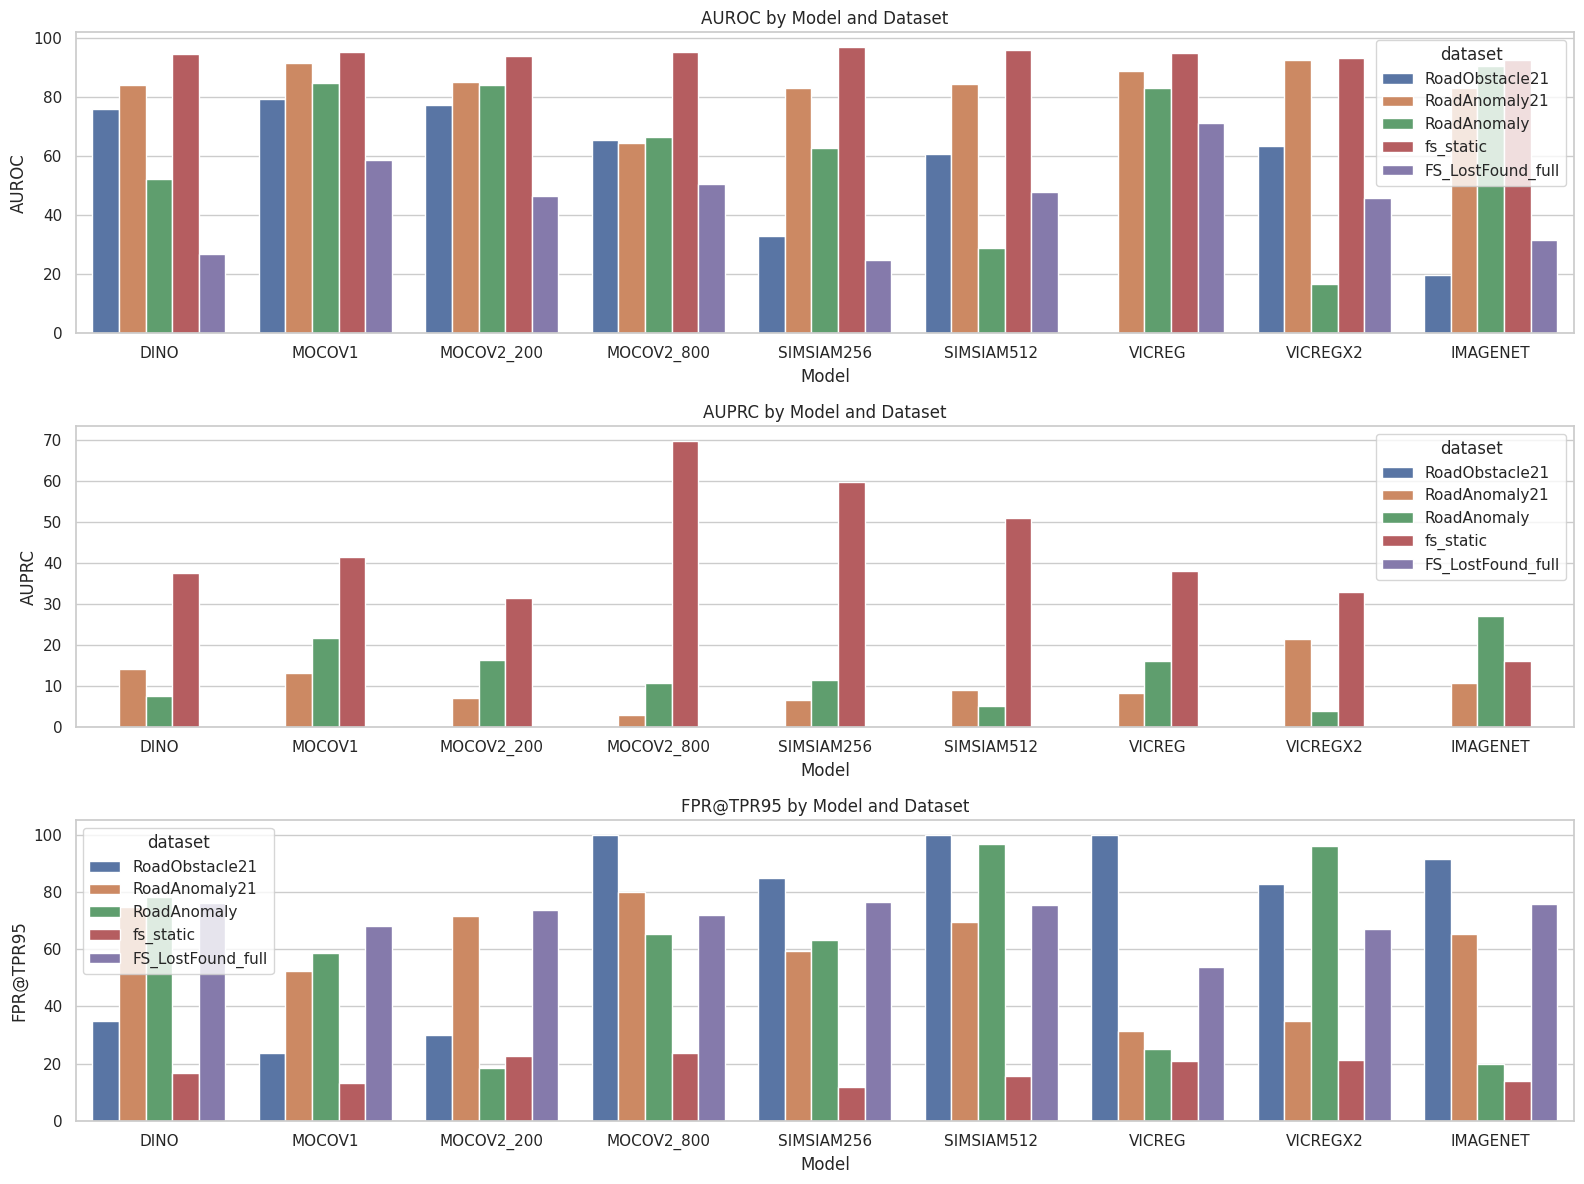

In [12]:
# Set the style and context for the plots
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

# Plotting AUROC
plt.subplot(3, 1, 1)
sns.barplot(x='model', y='auroc', hue='dataset', data=df)
plt.title('AUROC by Model and Dataset')
plt.ylabel('AUROC')
plt.xlabel('Model')

# Plotting AUPRC
plt.subplot(3, 1, 2)
sns.barplot(x='model', y='auprc', hue='dataset', data=df)
plt.title('AUPRC by Model and Dataset')
plt.ylabel('AUPRC')
plt.xlabel('Model')

# Plotting FPR@TPR95
plt.subplot(3, 1, 3)
sns.barplot(x='model', y='fpr@tpr95', hue='dataset', data=df)
plt.title('FPR@TPR95 by Model and Dataset')
plt.ylabel('FPR@TPR95')
plt.xlabel('Model')

plt.tight_layout()
plt.savefig('/home/gianluca/PycharmProjects/benchmark_loss/Mask2Former/evaluation/vis_results/results1_regular.png')
plt.show()


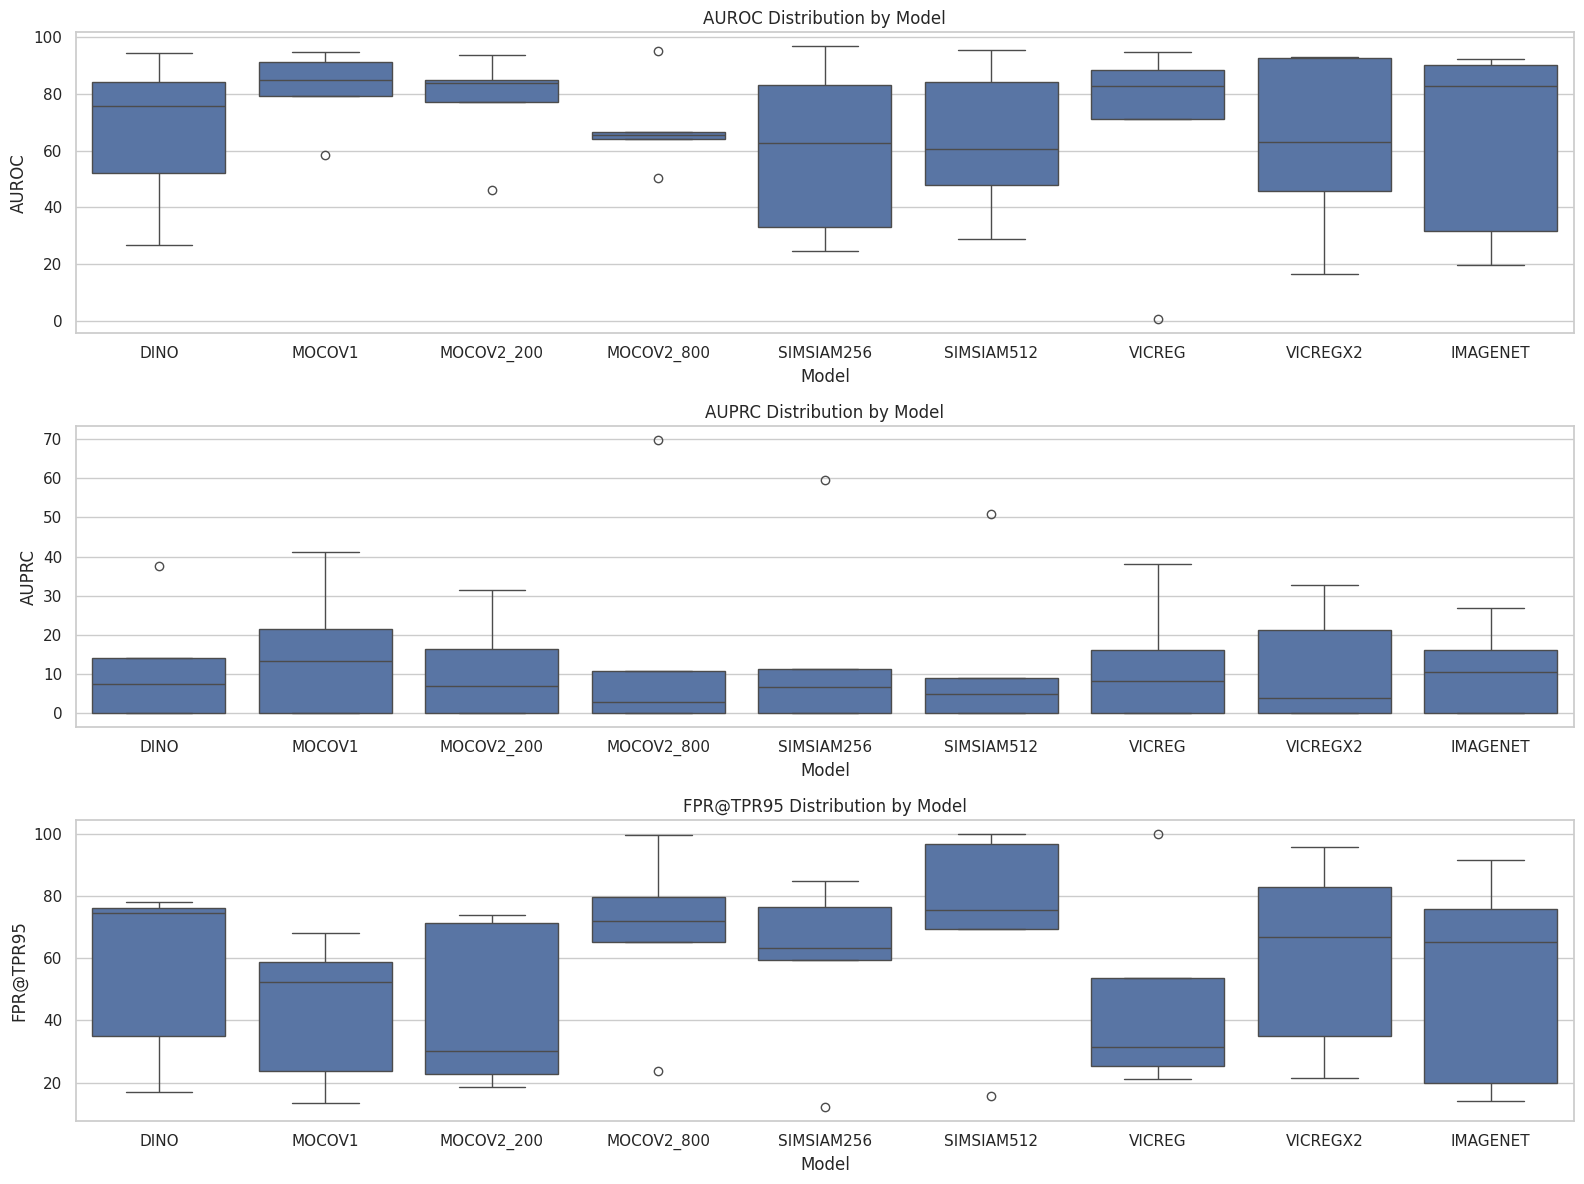

In [13]:
# Creating box plots for the metrics
plt.figure(figsize=(16, 12))

# Box Plot for AUROC
plt.subplot(3, 1, 1)
sns.boxplot(x='model', y='auroc', data=df)
plt.title('AUROC Distribution by Model')
plt.ylabel('AUROC')
plt.xlabel('Model')

# Box Plot for AUPRC
plt.subplot(3, 1, 2)
sns.boxplot(x='model', y='auprc', data=df)
plt.title('AUPRC Distribution by Model')
plt.ylabel('AUPRC')
plt.xlabel('Model')

# Box Plot for FPR@TPR95
plt.subplot(3, 1, 3)
sns.boxplot(x='model', y='fpr@tpr95', data=df)
plt.title('FPR@TPR95 Distribution by Model')
plt.ylabel('FPR@TPR95')
plt.xlabel('Model')

plt.tight_layout()
plt.savefig('/home/gianluca/PycharmProjects/benchmark_loss/Mask2Former/evaluation/vis_results/results2_regular.png')
plt.show()


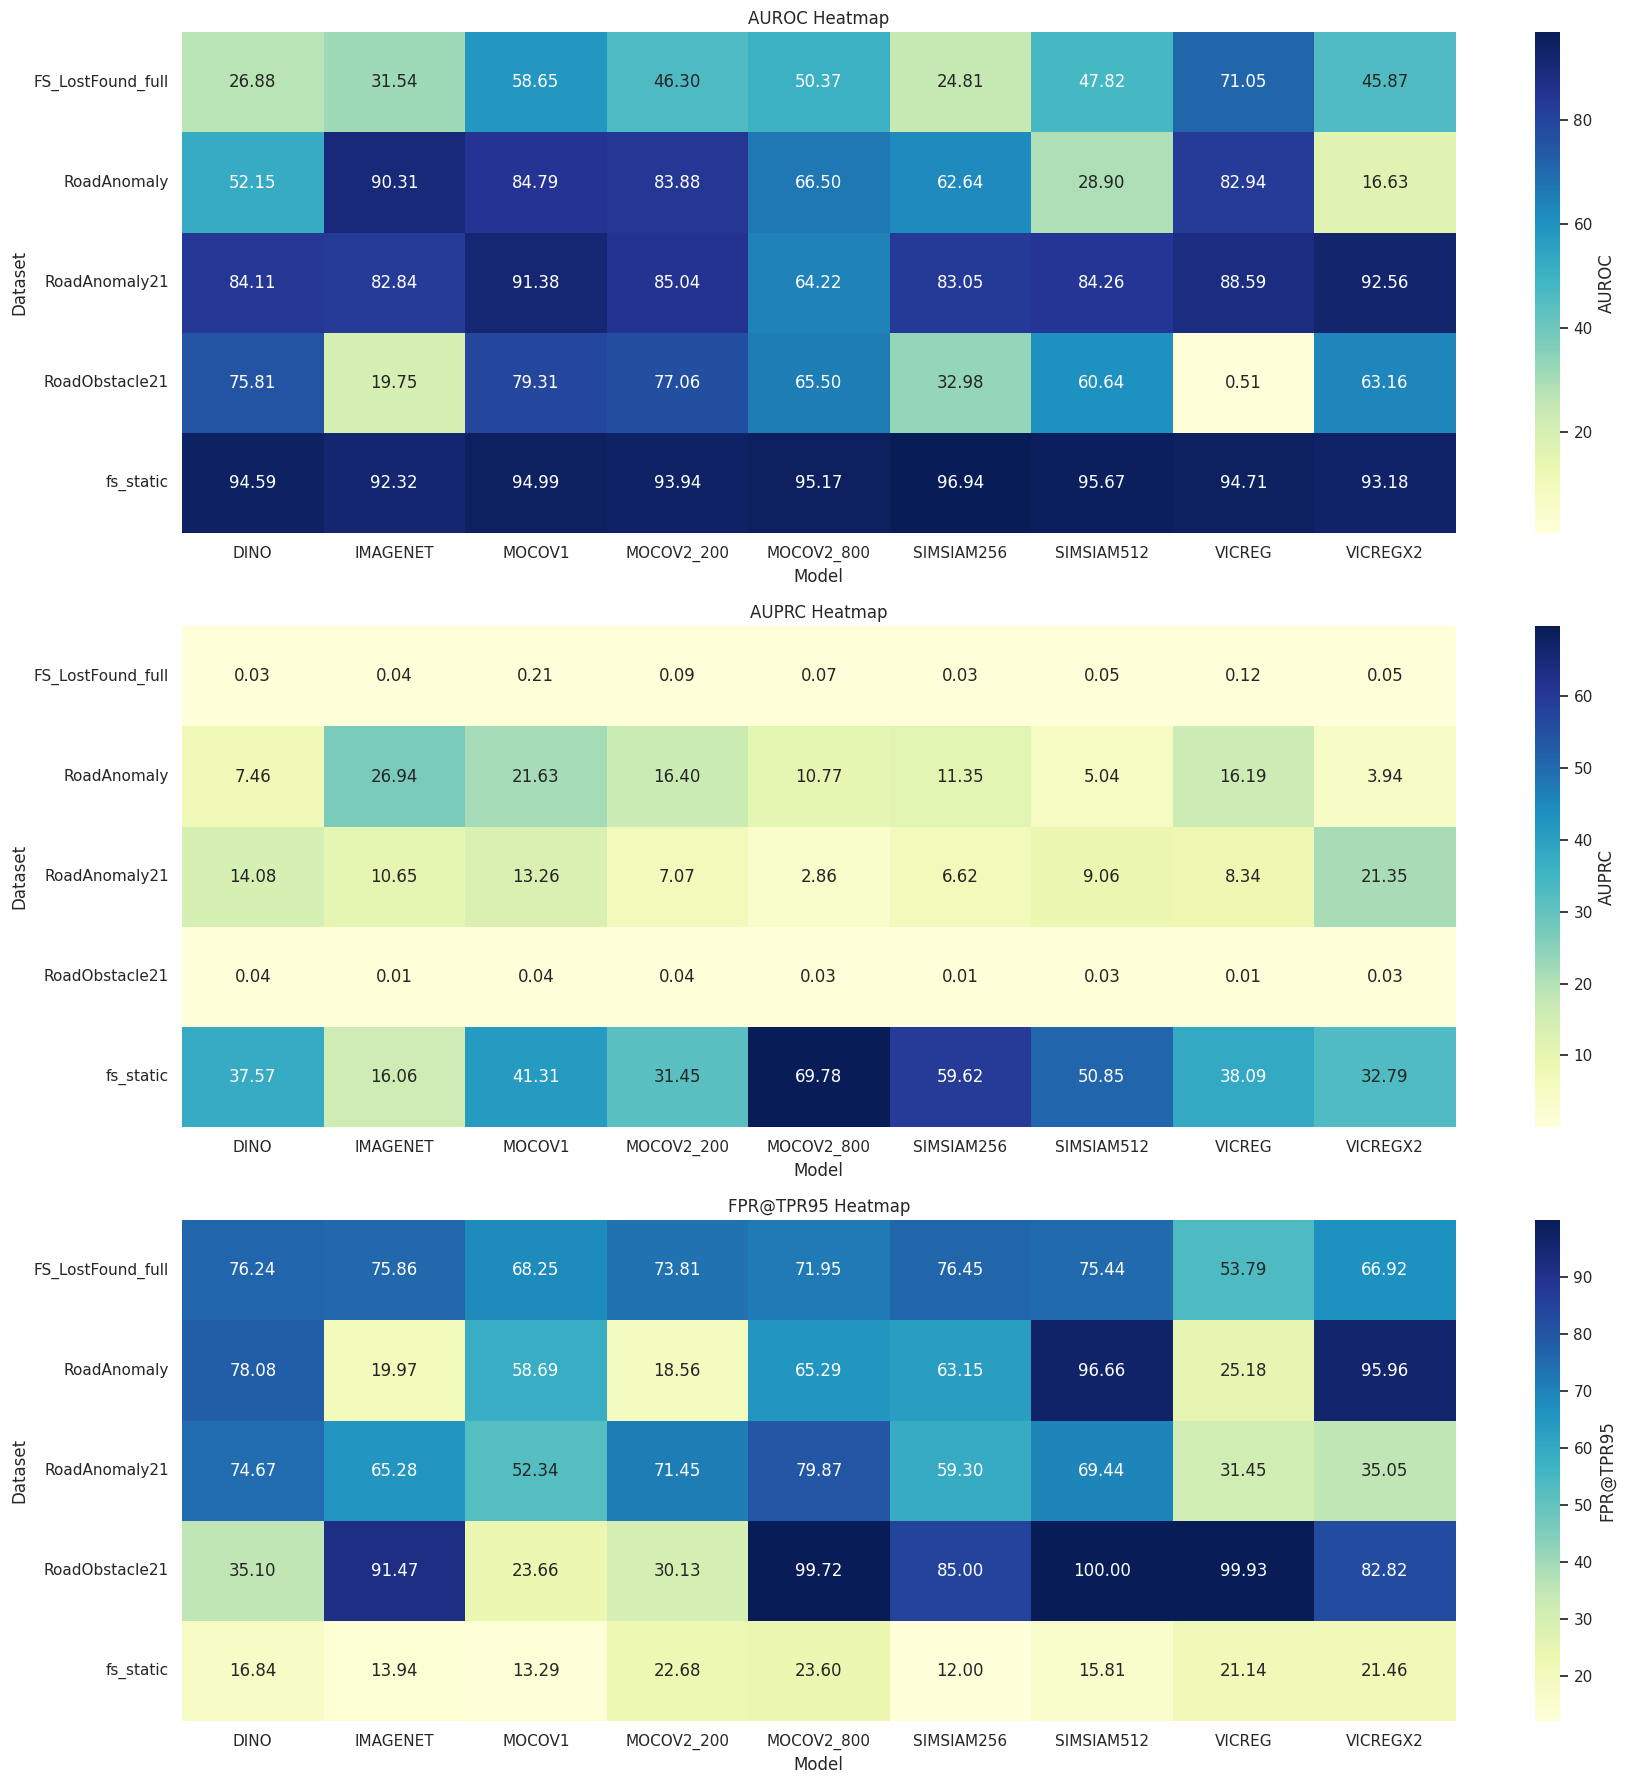

In [14]:
# Pivot the dataframe for heatmap visualization
auroc_pivot = df.pivot(index="dataset", columns="model", values="auroc")
auprc_pivot = df.pivot(index="dataset", columns="model", values="auprc")
fpr_pivot = df.pivot(index="dataset", columns="model", values="fpr@tpr95")

# Creating heatmaps
plt.figure(figsize=(18, 18))

# Heatmap for AUROC
plt.subplot(3, 1, 1)
sns.heatmap(auroc_pivot, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'AUROC'})
plt.title('AUROC Heatmap')
plt.xlabel('Model')
plt.ylabel('Dataset')

# Heatmap for AUPRC
plt.subplot(3, 1, 2)
sns.heatmap(auprc_pivot, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'AUPRC'})
plt.title('AUPRC Heatmap')
plt.xlabel('Model')
plt.ylabel('Dataset')

# Heatmap for FPR@TPR95
plt.subplot(3, 1, 3)
sns.heatmap(fpr_pivot, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'FPR@TPR95'})
plt.title('FPR@TPR95 Heatmap')
plt.xlabel('Model')
plt.ylabel('Dataset')

plt.tight_layout()
plt.savefig('/home/gianluca/PycharmProjects/benchmark_loss/Mask2Former/evaluation/vis_results/results3_regular.png')
plt.show()


In [15]:
# Identify the best performing models for each metric within each dataset type

best_performances_per_dataset = df.groupby('dataset').apply(lambda x: pd.Series({
    'Best_AUROC_Model': x.loc[x['auroc'].idxmax()]['model'],
    'Best_AUROC': x['auroc'].max(),
    'Best_AUPRC_Model': x.loc[x['auprc'].idxmax()]['model'],
    'Best_AUPRC': x['auprc'].max(),
    'Best_FPR@TPR95_Model': x.loc[x['fpr@tpr95'].idxmin()]['model'],
    'Best_FPR@TPR95': x['fpr@tpr95'].min()
})).reset_index()

# Display the best performing models for each dataset type
best_performances_per_dataset

# Calculate the average results for AUROC, AUPRC, and FPR@TPR95 across the five datasets
average_performances = best_performances_per_dataset[['Best_AUROC', 'Best_AUPRC', 'Best_FPR@TPR95']].mean().reset_index()
average_performances.columns = ['Metric', 'Average_Value']

# Display the average performances
average_performances

# Identify the best models based on these averages
best_models = {
    'Best_AUROC_Model': best_performances_per_dataset.loc[best_performances_per_dataset['Best_AUROC'] == best_performances_per_dataset['Best_AUROC'].max(), 'Best_AUROC_Model'].values[0],
    'Best_AUPRC_Model': best_performances_per_dataset.loc[best_performances_per_dataset['Best_AUPRC'] == best_performances_per_dataset['Best_AUPRC'].max(), 'Best_AUPRC_Model'].values[0],
    'Best_FPR@TPR95_Model': best_performances_per_dataset.loc[best_performances_per_dataset['Best_FPR@TPR95'] == best_performances_per_dataset['Best_FPR@TPR95'].min(), 'Best_FPR@TPR95_Model'].values[0]
}

best_models


{'Best_AUROC_Model': 'SIMSIAM256',
 'Best_AUPRC_Model': 'MOCOV2_800',
 'Best_FPR@TPR95_Model': 'SIMSIAM256'}

## OOD results

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = '/home/gianluca/PycharmProjects/benchmark_loss/Mask2Former/evaluation/data_results/results_ood.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()


,model,dataset,auroc,auprc,fpr@tpr95,time execution
0,DINO,RoadObstacle21,75.8114%,0.0363%,35.0982%,2.90
1,DINO,RoadAnomaly21,84.1129%,14.0787%,74.6746%,1.91
2,DINO,RoadAnomaly,52.1450%,7.4570%,78.0807%,2.10
3,DINO,fs_static,94.5878%,37.5729%,16.8452%,3.47
4,DINO,FS_LostFound_full,26.8841%,0.0337%,76.2434%,2.95


In [17]:

# Data Cleaning and Preparation
# Remove '%' and convert to float
df['auroc'] = df['auroc'].str.rstrip('%').astype(float)
df['auprc'] = df['auprc'].str.rstrip('%').astype(float)
df['fpr@tpr95'] = df['fpr@tpr95'].str.rstrip('%').astype(float)
df['time execution'] = df['time execution'].astype(float)

# Summary Statistics
summary_stats = df.groupby('model').agg({
    'auroc': ['mean', 'std', 'max'],
    'auprc': ['mean', 'std', 'max'],
    'fpr@tpr95': ['mean', 'std', 'min'],
    'time execution': ['mean', 'std', 'min']
}).reset_index()

# Display summary statistics
summary_stats.head()


model     auroc                         auprc                      \
                   mean        std      max      mean        std      max   
0        DINO  66.70824  27.208040  94.5878  11.83572  15.533195  37.5729   
1    IMAGENET  63.34904  34.851818  92.3188  10.73944  11.406688  26.9393   
2      MOCOV1  52.44422  39.785318  88.5319   4.36290   5.146333  12.8758   
3  MOCOV2_200  40.51236  15.904658  53.9884   1.69826   1.752552   4.4152   
4  MOCOV2_800  46.43832  26.369116  74.5167   2.75452   2.982477   6.9771   

  fpr@tpr95                     time execution                  
       mean        std      min           mean       std   min  
0  56.18842  28.354450  16.8452          2.666  0.646862  1.91  
1  53.30462  34.534090  13.9357          2.722  0.693736  1.88  
2  76.71672  24.544329  44.4587          3.408  0.981718  2.32  
3  91.71958  11.061096  72.3663          2.860  0.738614  2.00  
4  80.32150  20.629029  46.1454          3.616  1.000215  2.38

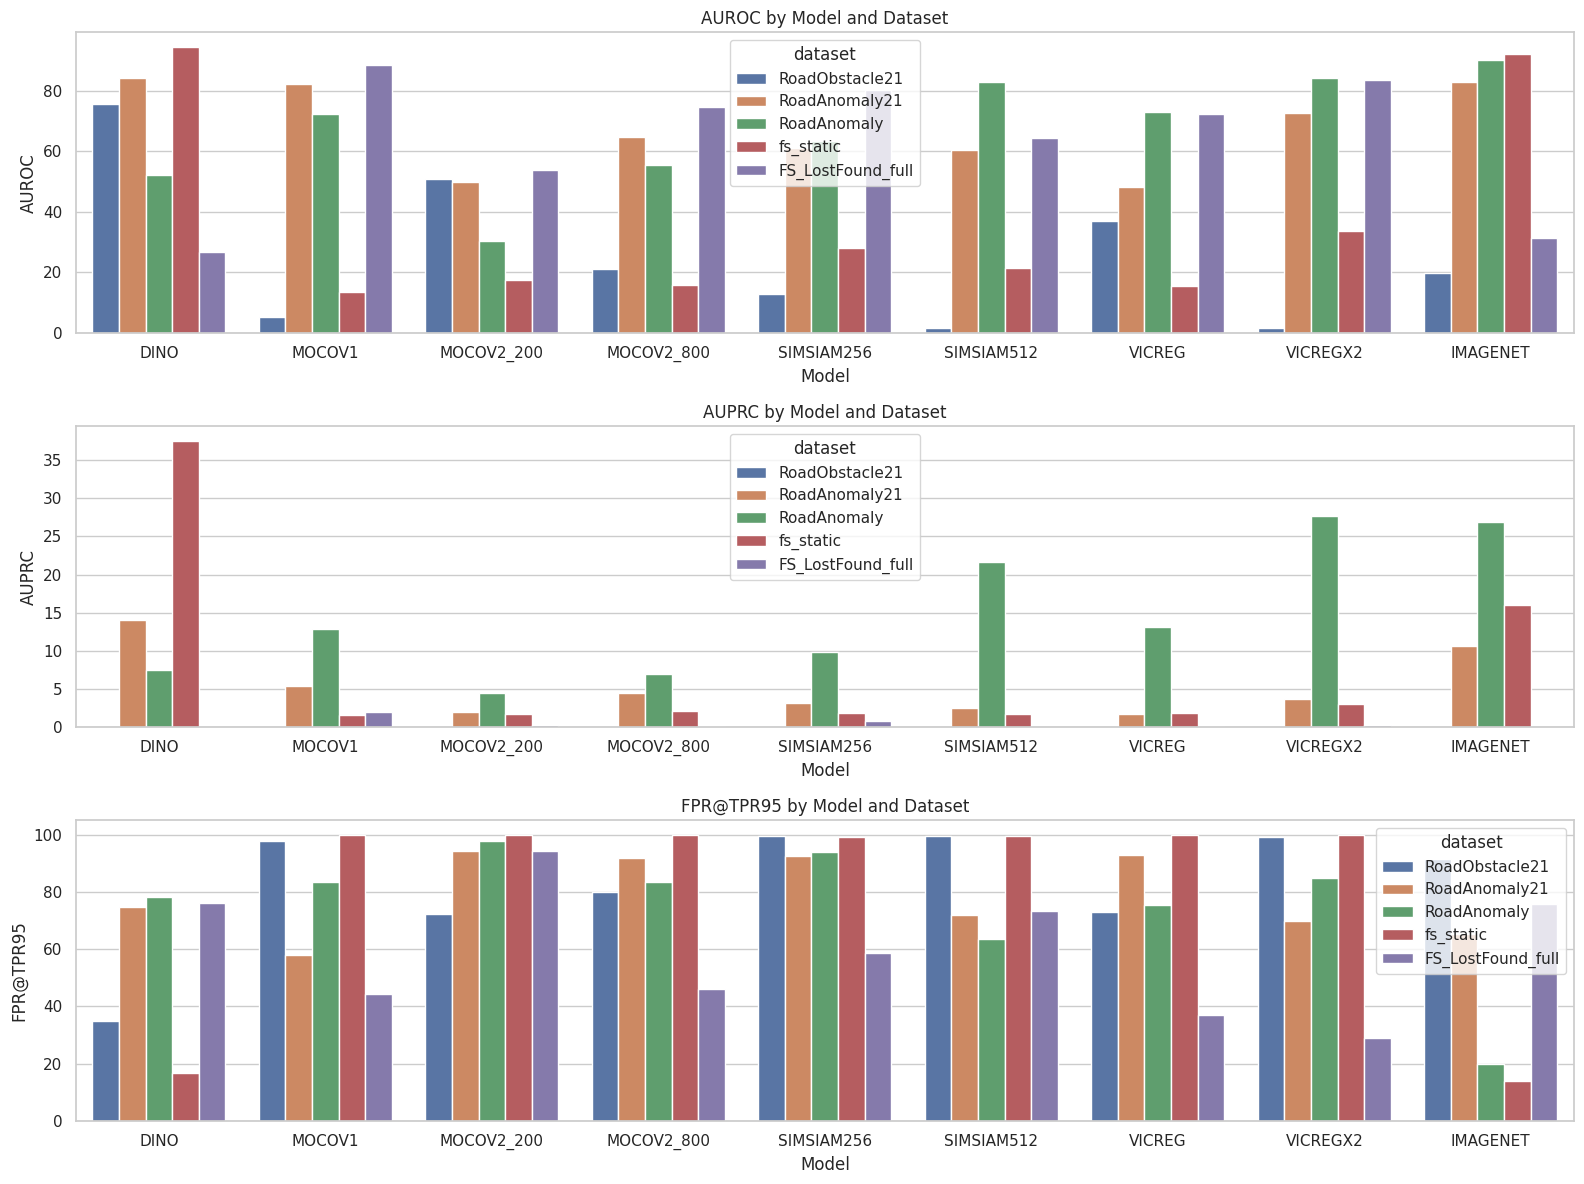

In [18]:
# Set the style and context for the plots
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

# Plotting AUROC
plt.subplot(3, 1, 1)
sns.barplot(x='model', y='auroc', hue='dataset', data=df)
plt.title('AUROC by Model and Dataset')
plt.ylabel('AUROC')
plt.xlabel('Model')

# Plotting AUPRC
plt.subplot(3, 1, 2)
sns.barplot(x='model', y='auprc', hue='dataset', data=df)
plt.title('AUPRC by Model and Dataset')
plt.ylabel('AUPRC')
plt.xlabel('Model')

# Plotting FPR@TPR95
plt.subplot(3, 1, 3)
sns.barplot(x='model', y='fpr@tpr95', hue='dataset', data=df)
plt.title('FPR@TPR95 by Model and Dataset')
plt.ylabel('FPR@TPR95')
plt.xlabel('Model')

plt.tight_layout()
plt.savefig('/home/gianluca/PycharmProjects/benchmark_loss/Mask2Former/evaluation/vis_results/results.png')
plt.show()


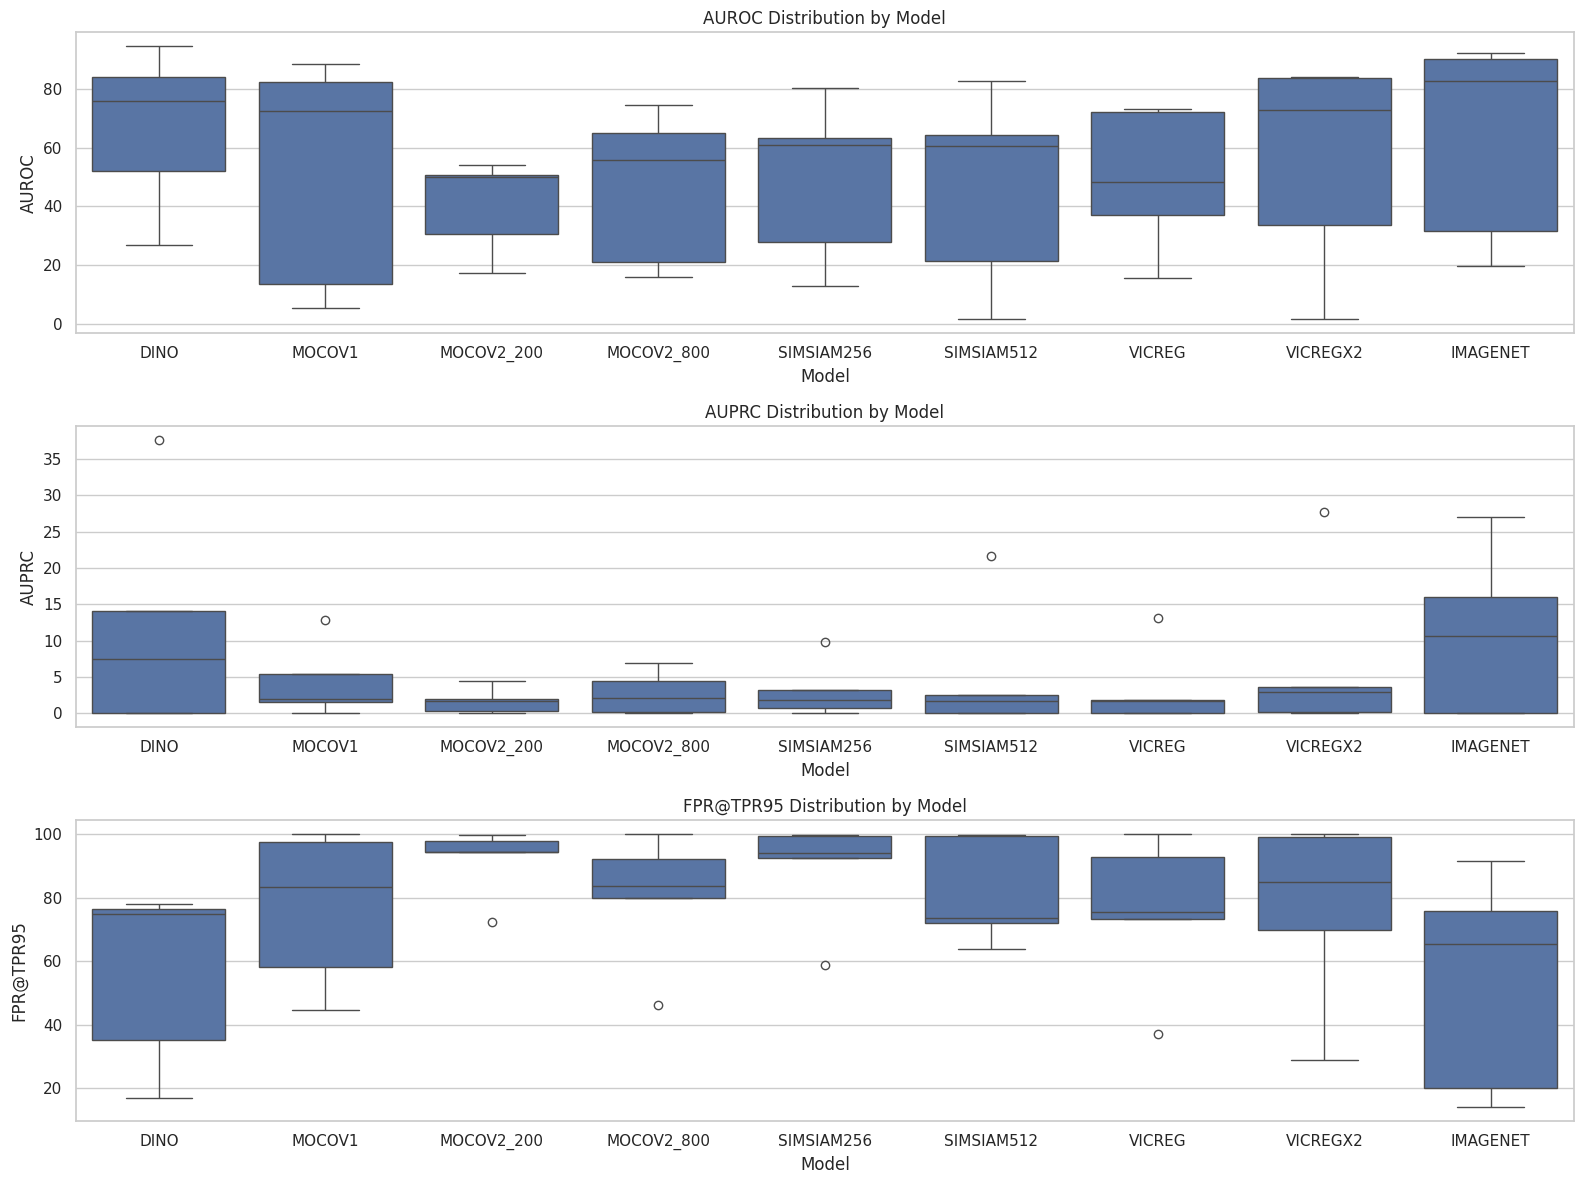

In [19]:
# Creating box plots for the metrics
plt.figure(figsize=(16, 12))

# Box Plot for AUROC
plt.subplot(3, 1, 1)
sns.boxplot(x='model', y='auroc', data=df)
plt.title('AUROC Distribution by Model')
plt.ylabel('AUROC')
plt.xlabel('Model')

# Box Plot for AUPRC
plt.subplot(3, 1, 2)
sns.boxplot(x='model', y='auprc', data=df)
plt.title('AUPRC Distribution by Model')
plt.ylabel('AUPRC')
plt.xlabel('Model')

# Box Plot for FPR@TPR95
plt.subplot(3, 1, 3)
sns.boxplot(x='model', y='fpr@tpr95', data=df)
plt.title('FPR@TPR95 Distribution by Model')
plt.ylabel('FPR@TPR95')
plt.xlabel('Model')

plt.tight_layout()
plt.savefig('/home/gianluca/PycharmProjects/benchmark_loss/Mask2Former/evaluation/vis_results/results2.png')
plt.show()


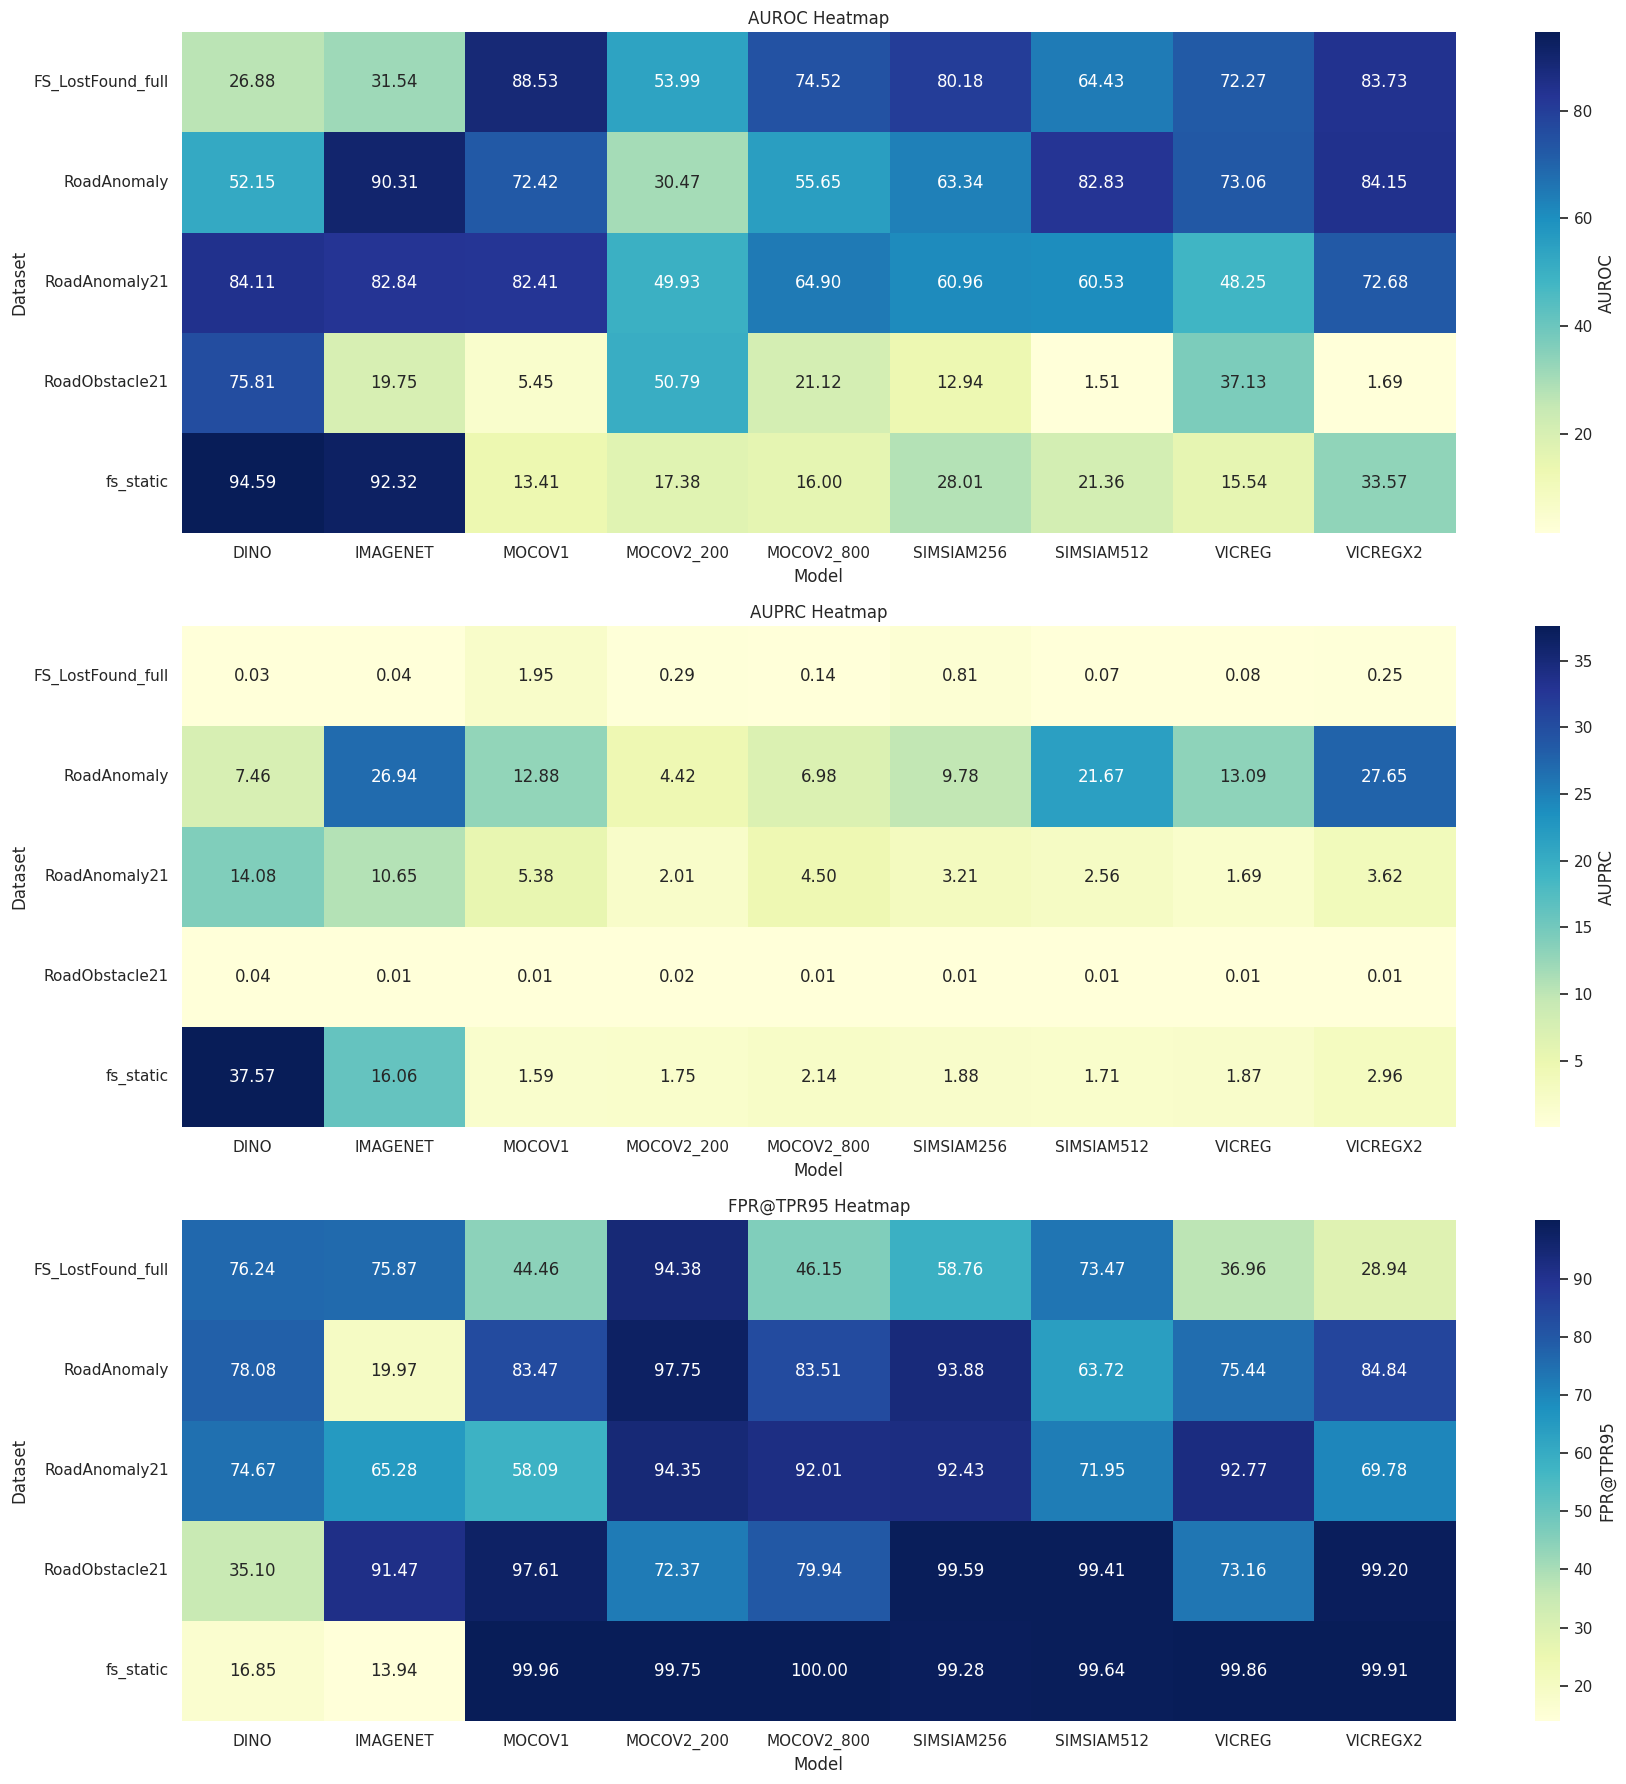

In [20]:
# Pivot the dataframe for heatmap visualization
auroc_pivot = df.pivot(index="dataset", columns="model", values="auroc")
auprc_pivot = df.pivot(index="dataset", columns="model", values="auprc")
fpr_pivot = df.pivot(index="dataset", columns="model", values="fpr@tpr95")

# Creating heatmaps
plt.figure(figsize=(18, 18))

# Heatmap for AUROC
plt.subplot(3, 1, 1)
sns.heatmap(auroc_pivot, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'AUROC'})
plt.title('AUROC Heatmap')
plt.xlabel('Model')
plt.ylabel('Dataset')

# Heatmap for AUPRC
plt.subplot(3, 1, 2)
sns.heatmap(auprc_pivot, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'AUPRC'})
plt.title('AUPRC Heatmap')
plt.xlabel('Model')
plt.ylabel('Dataset')

# Heatmap for FPR@TPR95
plt.subplot(3, 1, 3)
sns.heatmap(fpr_pivot, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'FPR@TPR95'})
plt.title('FPR@TPR95 Heatmap')
plt.xlabel('Model')
plt.ylabel('Dataset')

plt.tight_layout()
plt.savefig('/home/gianluca/PycharmProjects/benchmark_loss/Mask2Former/evaluation/vis_results/results3.png')
plt.show()


In [21]:
# Identify the best performing models for each metric within each dataset type

best_performances_per_dataset = df.groupby('dataset').apply(lambda x: pd.Series({
    'Best_AUROC_Model': x.loc[x['auroc'].idxmax()]['model'],
    'Best_AUROC': x['auroc'].max(),
    'Best_AUPRC_Model': x.loc[x['auprc'].idxmax()]['model'],
    'Best_AUPRC': x['auprc'].max(),
    'Best_FPR@TPR95_Model': x.loc[x['fpr@tpr95'].idxmin()]['model'],
    'Best_FPR@TPR95': x['fpr@tpr95'].min()
})).reset_index()

# Display the best performing models for each dataset type
best_performances_per_dataset

# Calculate the average results for AUROC, AUPRC, and FPR@TPR95 across the five datasets
average_performances = best_performances_per_dataset[['Best_AUROC', 'Best_AUPRC', 'Best_FPR@TPR95']].mean().reset_index()
average_performances.columns = ['Metric', 'Average_Value']

# Display the average performances
average_performances

# Identify the best models based on these averages
best_models = {
    'Best_AUROC_Model': best_performances_per_dataset.loc[best_performances_per_dataset['Best_AUROC'] == best_performances_per_dataset['Best_AUROC'].max(), 'Best_AUROC_Model'].values[0],
    'Best_AUPRC_Model': best_performances_per_dataset.loc[best_performances_per_dataset['Best_AUPRC'] == best_performances_per_dataset['Best_AUPRC'].max(), 'Best_AUPRC_Model'].values[0],
    'Best_FPR@TPR95_Model': best_performances_per_dataset.loc[best_performances_per_dataset['Best_FPR@TPR95'] == best_performances_per_dataset['Best_FPR@TPR95'].min(), 'Best_FPR@TPR95_Model'].values[0]
}

best_models


{'Best_AUROC_Model': 'DINO',
 'Best_AUPRC_Model': 'DINO',
 'Best_FPR@TPR95_Model': 'IMAGENET'}